# Safe Anytime Valid Inference

This implementation demonstrates the key concepts from both examples in the paper: <br>
Safe Anytime-Valid Inference: Practical Maximally Flexible Sampling Designs for Experiments Based on e-Values (2024) <br>
Authors: Alexander Ly, Udo Boehm, Peter Grünwald, Aaditya Ramdas, and Don van Ravenzwaij

Example 1 (Moral Typecasting) shows how e-values allow for early stopping while maintaining proper type I error control. The test can reject the null hypothesis earlier than a classical test would allow, potentially saving resources.
Example 2 (Macbeth Effect) demonstrates how e-values can help determine the absence of effects. The analysis runs to completion to show how e-values provide evidence against the original finding.

In [1]:
import numpy as np
import os
os.chdir("/Users/a1002142/Desktop/private_repo/expectation/")

from expectation.modules.hypothesistesting import EValueConfig
from expectation.seqtest.sequential_e_testing import SequentialTest, TestType
from expectation.utils.helper_functions import plot_sequential_test

### Example 1: Moral typecasting (Gray & Wegner, 2009, Study 1a)
    
Demonstrates how e-values allow early stopping while maintaining type I error control. <br>
Original study found adults were perceived as more responsible than babies for harmful actions.


In [ ]:
# Configure test based on original study parameters
config = EValueConfig(significance_level=0.05, allow_infinite=False)

# Create test object - one-sided since hypothesis predicts direction
test = SequentialTest(
    test_type="mean",
    null_value=0,
    alternative="greater", 
    config=config
)

In [43]:
# Generate example data similar to Carleton University replication
np.random.seed(42)
adult_ratings = np.random.normal(5.29, 1.86, size=66)  # Adult condition
baby_ratings = np.random.normal(3.86, 1.64, size=55)   # Baby condition

batch_size = 1

In [44]:
for i in range(0, len(adult_ratings), batch_size):
    adult_batch = adult_ratings[i:i+batch_size]
    baby_batch = baby_ratings[i:i+batch_size]
    
    # Skip if unequal batch sizes at end
    if len(adult_batch) != len(baby_batch):
        continue
        
    result = test.update(adult_batch - baby_batch)  # Test difference scores
    
    print(f"\nBatch {i//batch_size + 1}:")
    print(f"E-value: {result.e_value:.2f}")
    print(f"Cumulative e-value: {result.e_process.cumulative_value:.2f}")
    print(f"Reject null: {result.reject_null}")
    
    # Stop early if we reject null hypothesis
    # Uncomment to use
    # if result.reject_null:
    #     print("\nStopping early - sufficient evidence to reject null")
    #     print(f"Total samples analyzed: {result.sample_size}")
    #     break


Batch 1:
E-value: 10.22
Cumulative e-value: 10.22
Reject null: False

Batch 2:
E-value: 0.27
Cumulative e-value: 2.75
Reject null: False

Batch 3:
E-value: 4.34
Cumulative e-value: 11.92
Reject null: False

Batch 4:
E-value: 150447.89
Cumulative e-value: 1793086.64
Reject null: True

Batch 5:
E-value: 0.51
Cumulative e-value: 916903.00
Reject null: True

Batch 6:
E-value: 0.16
Cumulative e-value: 144453.42
Reject null: True

Batch 7:
E-value: 3483.67
Cumulative e-value: 503227402.69
Reject null: True

Batch 8:
E-value: 0.46
Cumulative e-value: 233988741.29
Reject null: True

Batch 9:
E-value: 19282.16
Cumulative e-value: 4511808622490.33
Reject null: True

Batch 10:
E-value: 1.04
Cumulative e-value: 4708422660557.13
Reject null: True

Batch 11:
E-value: 0.52
Cumulative e-value: 2458397097385.93
Reject null: True

Batch 12:
E-value: 1.00
Cumulative e-value: 2454221204744.25
Reject null: True

Batch 13:
E-value: 2.54
Cumulative e-value: 6241016664260.09
Reject null: True

Batch 14:
E-va

(<Figure size 1500x1000 with 5 Axes>,
 (<Axes: title={'center': 'Individual E-values'}, xlabel='Step', ylabel='E-value'>,
  <Axes: title={'center': 'Cumulative E-values (E-Process)'}, xlabel='Step', ylabel='Cumulative E-value'>,
  <Axes: title={'center': 'E-power (growth rate)'}, xlabel='Step', ylabel='E-power'>,
  <Axes: title={'center': 'p-values (converted from e-values)'}, xlabel='Step', ylabel='p-value'>,
  <Axes: title={'center': 'Raw Observations'}, xlabel='Step', ylabel='Value'>))

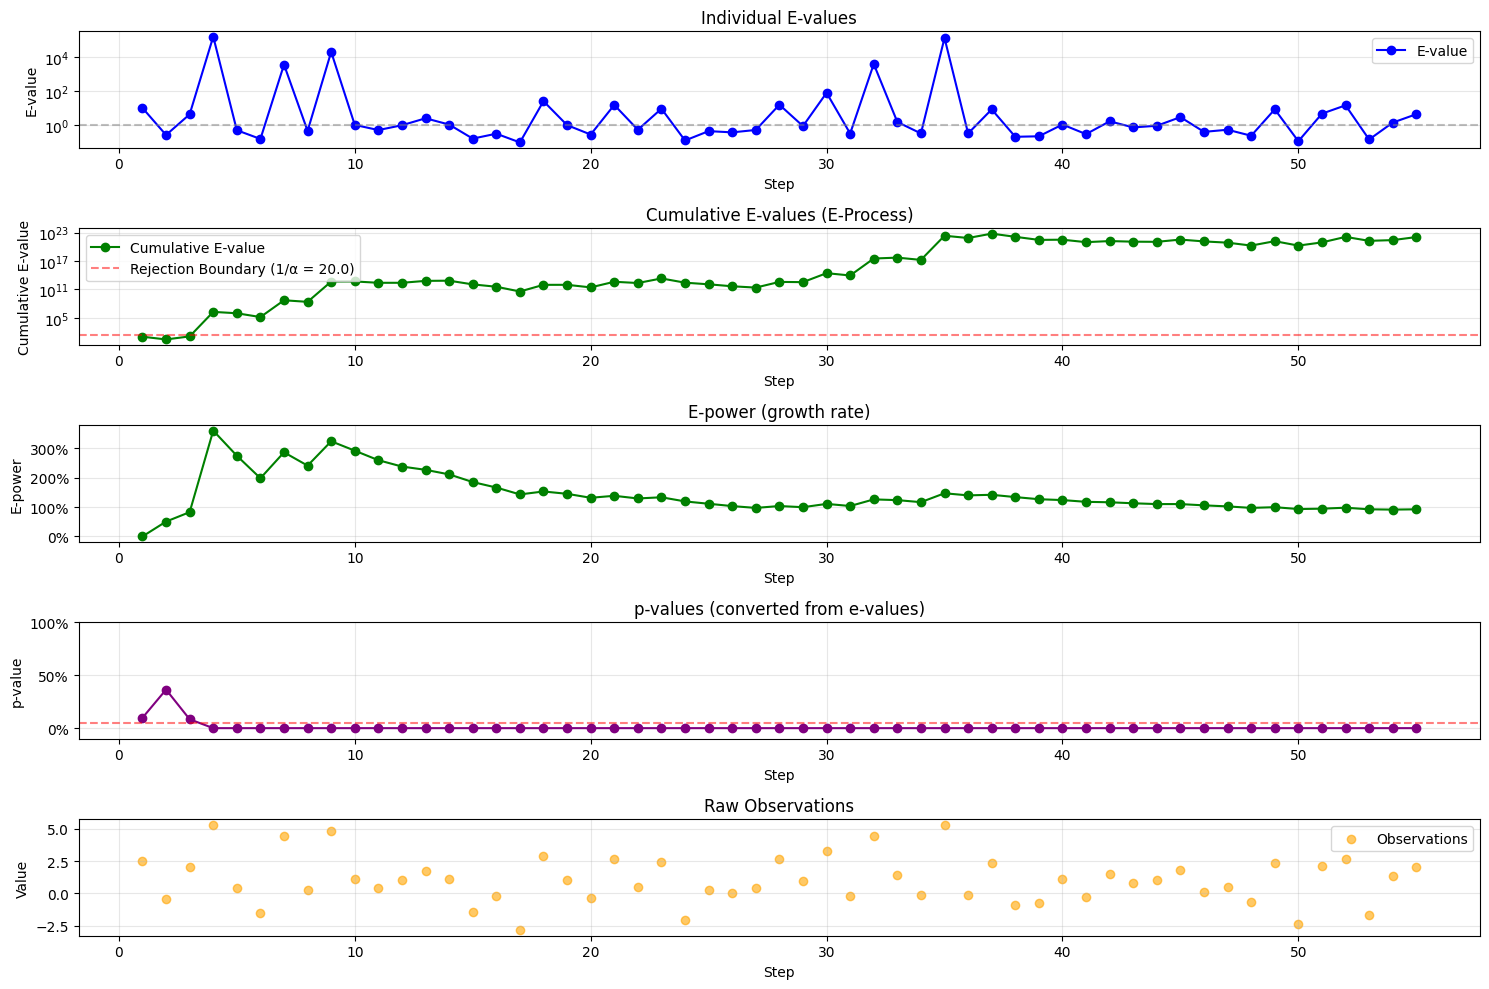

In [45]:
plot_sequential_test(test.get_history_df(), log=True)

### Example 2: The Macbeth Effect (Zhong & Liljenquist, 2006, Study 2)

Testing whether moral violations increase desire for physical cleansing.
Original study:
- Unethical condition: mean = 4.95, sd = 0.84, n = 27
- Ethical condition: mean = 3.75, sd = 1.32, n = 27

In [38]:
config = EValueConfig(significance_level=0.05, allow_infinite=False)

test = SequentialTest(
    test_type="mean",
    null_value=0,
    alternative="greater",
    config=config
)

# Generate example data similar to replication attempts
np.random.seed(42)
unethical_ratings = np.random.normal(4.95, 0.84, size=27)  # Unethical condition
ethical_ratings = np.random.normal(3.75, 1.32, size=27)    # Ethical condition


In [40]:
batch_size = 3
for i in range(0, len(unethical_ratings), batch_size):
    unethical_batch = unethical_ratings[i:i+batch_size]
    ethical_batch = ethical_ratings[i:i+batch_size]
    
    if len(unethical_batch) != len(ethical_batch):
        continue
        
    result = test.update(unethical_batch - ethical_batch)
    
    print(f"\nBatch {i//batch_size + 1}:")
    print(f"E-value: {result.e_value:.2f}")
    print(f"Cumulative e-value: {result.e_process.cumulative_value:.2f}")
    print(f"Reject null: {result.reject_null}")
    
    # For this example, we'll run the full analysis to show non-significance
    
print(f"\nFinal analysis complete")
print(f"Total samples analyzed: {result.sample_size}")


Batch 1:
E-value: 32.38
Cumulative e-value: 38318601206.48
Reject null: True

Batch 2:
E-value: 2.23
Cumulative e-value: 85602798524.64
Reject null: True

Batch 3:
E-value: 1043.06
Cumulative e-value: 89288960836026.41
Reject null: True

Batch 4:
E-value: 1720.36
Cumulative e-value: 153609519846034272.00
Reject null: True

Batch 5:
E-value: 0.28
Cumulative e-value: 42849519631655216.00
Reject null: True

Batch 6:
E-value: 28.60
Cumulative e-value: 1225703147187481600.00
Reject null: True

Batch 7:
E-value: 2.66
Cumulative e-value: 3262938764839614464.00
Reject null: True

Batch 8:
E-value: 5.27
Cumulative e-value: 17185434803820894208.00
Reject null: True

Batch 9:
E-value: 2.25
Cumulative e-value: 38751817996270346240.00
Reject null: True

Final analysis complete
Total samples analyzed: 54


(<Figure size 1500x1000 with 5 Axes>,
 (<Axes: title={'center': 'Individual E-values'}, xlabel='Step', ylabel='E-value'>,
  <Axes: title={'center': 'Cumulative E-values (E-Process)'}, xlabel='Step', ylabel='Cumulative E-value'>,
  <Axes: title={'center': 'E-power (growth rate)'}, xlabel='Step', ylabel='E-power'>,
  <Axes: title={'center': 'p-values (converted from e-values)'}, xlabel='Step', ylabel='p-value'>,
  <Axes: title={'center': 'Raw Observations'}, xlabel='Step', ylabel='Value'>))

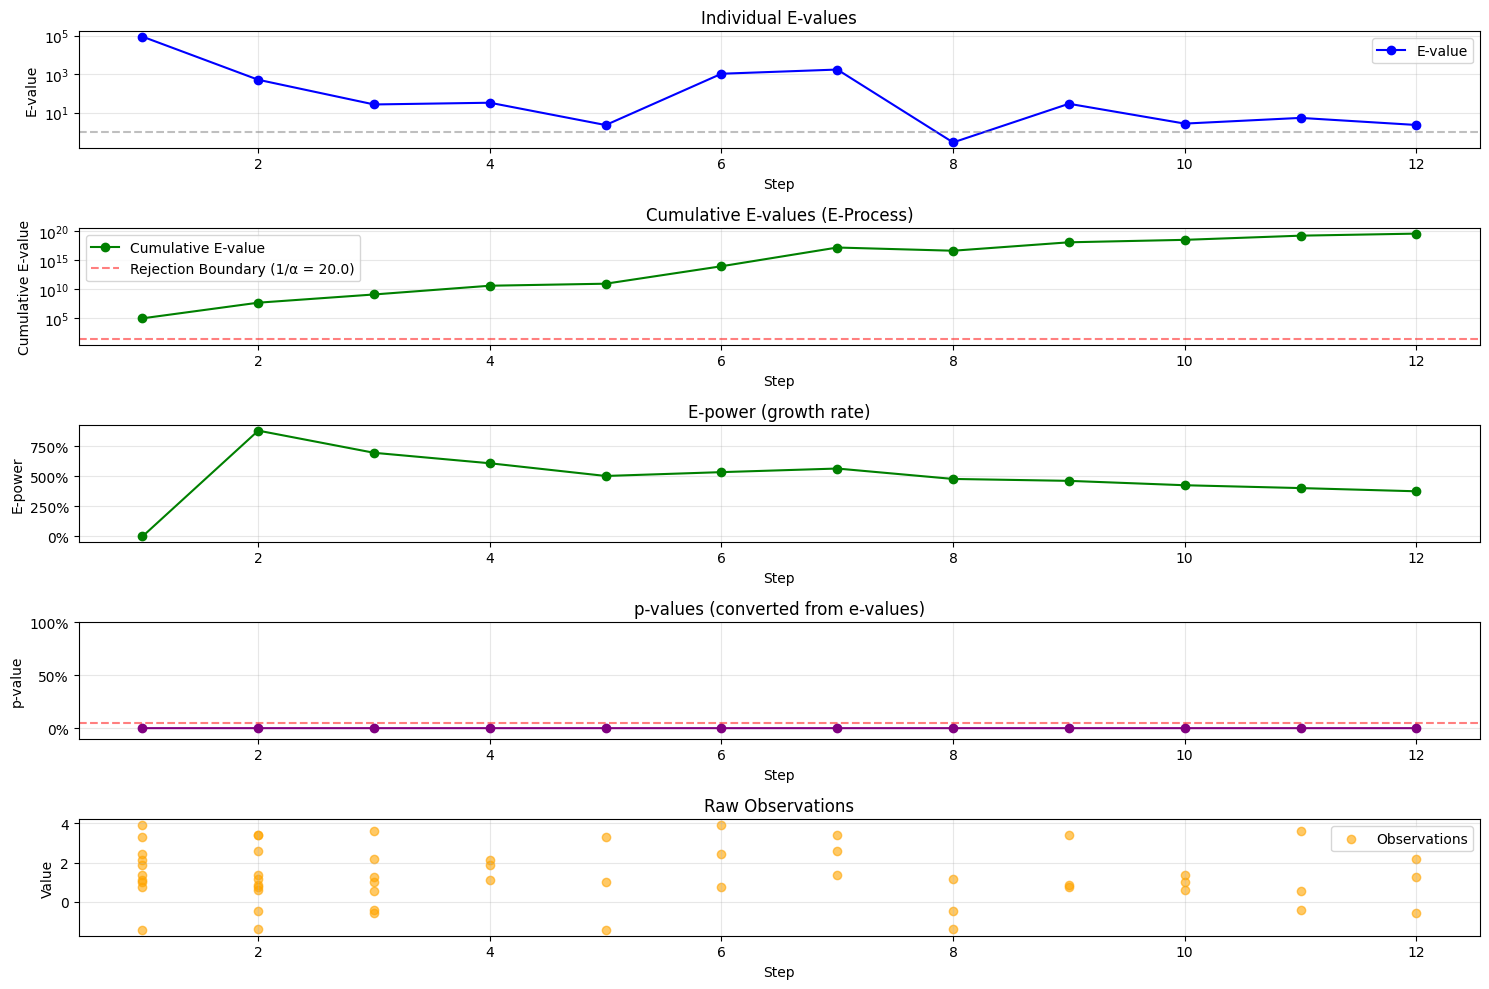

In [41]:
plot_sequential_test(test.get_history_df(), log=True)